In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train = pd.read_csv("./wind/train.csv")
test = pd.read_csv("./wind/test.csv")
submission = pd.read_csv("./wind/sample_submission.csv")

In [4]:
train.isna().sum()

id                0
temperature       0
pressure          0
humidity          0
wind_speed        0
wind_direction    0
precipitation     0
snowing           0
cloudiness        0
target            0
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19275 entries, 0 to 19274
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              19275 non-null  object 
 1   temperature     19275 non-null  float64
 2   pressure        19275 non-null  float64
 3   humidity        19275 non-null  float64
 4   wind_speed      19275 non-null  float64
 5   wind_direction  19275 non-null  float64
 6   precipitation   19275 non-null  float64
 7   snowing         19275 non-null  bool   
 8   cloudiness      19275 non-null  float64
 9   target          19275 non-null  float64
dtypes: bool(1), float64(8), object(1)
memory usage: 1.3+ MB


In [95]:
train.head(20)

,id,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,snowing,cloudiness,target
0,TRAIN_00000,27.8816,1013.6,46.8,2.4,232.4,0.00,NaN,0.0,1.180
1,TRAIN_00001,5.7540,1026.6,76.6,3.6,172.0,0.00,NaN,8.8,8.581
2,TRAIN_00002,20.8220,1016.2,64.8,2.2,206.0,0.06,NaN,23.0,3.978
3,TRAIN_00003,20.0758,1017.4,72.6,0.8,215.4,0.00,NaN,0.0,8.301
4,TRAIN_00004,7.5260,1023.2,82.8,1.2,158.0,0.00,NaN,15.0,1.692
5,TRAIN_00005,24.8500,1011.2,64.6,2.2,126.0,0.00,NaN,0.0,1.971
6,TRAIN_00006,32.9420,1016.8,35.8,3.8,166.0,0.00,NaN,16.0,7.179
7,TRAIN_00007,14.8120,1006.8,73.0,4.0,172.0,0.12,NaN,60.0,9.110
8,TRAIN_00008,12.3210,1025.8,66.6,1.0,170.4,0.00,NaN,2.8,12.238
9,TRAIN_00009,20.7706,1004.4,67.0,1.4,215.2,0.00,NaN,11.2,7.333


In [6]:
test.head(20)

,id,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,snowing,cloudiness
0,TEST_00000,20.702000,1021.0,76.4,2.0,104.8,0.00,False,23.0
1,TEST_00001,18.673669,1014.4,59.6,2.4,179.2,0.12,False,32.4
2,TEST_00002,29.908000,1020.6,49.6,2.6,78.0,0.60,False,23.0
3,TEST_00003,24.504000,1014.6,61.0,1.8,118.0,0.00,False,15.0
4,TEST_00004,12.590000,1011.4,70.8,1.8,110.0,0.12,False,34.0
5,TEST_00005,14.078000,1014.6,79.8,1.2,100.0,0.00,False,41.0
6,TEST_00006,10.510000,1008.4,49.2,2.0,62.0,0.00,False,12.0
7,TEST_00007,11.004000,999.4,78.0,3.0,228.6,0.36,False,60.0
8,TEST_00008,11.789731,1029.2,42.4,2.4,109.6,0.00,False,0.0
9,TEST_00009,17.182000,1020.4,73.4,1.0,70.0,0.00,False,12.0


C:\Users\Playdata\AppData\Local\Temp\ipykernel_16036\2146937348.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train.corr(method = "spearman")


<AxesSubplot: >

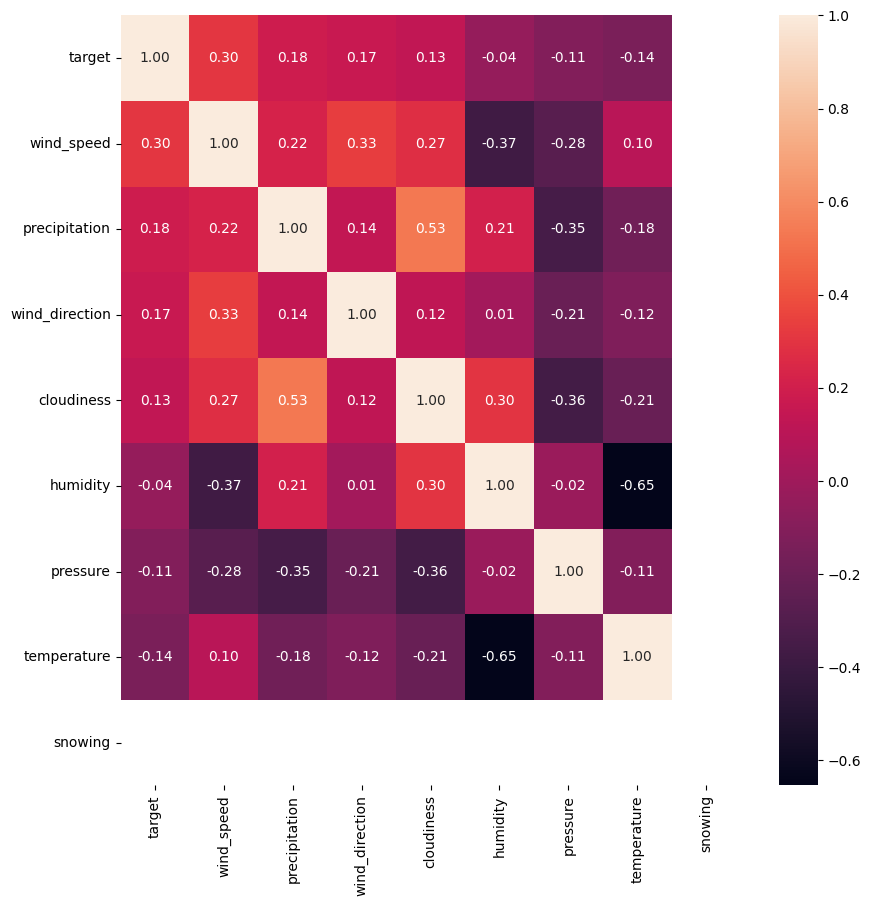

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
corrmat = train.corr(method = "spearman")
indexes = corrmat.nlargest(n=10, columns='target').index
corrmat = train[indexes].corr(method='spearman')
sns.heatmap(data=corrmat, annot=True, cbar=True, fmt='.2f', ax=ax)

<AxesSubplot: xlabel='wind_speed', ylabel='target'>

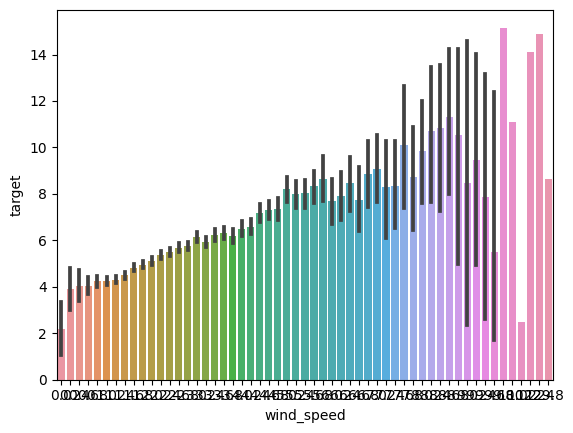

In [15]:
sns.barplot(x="wind_speed", y="target", data=train)

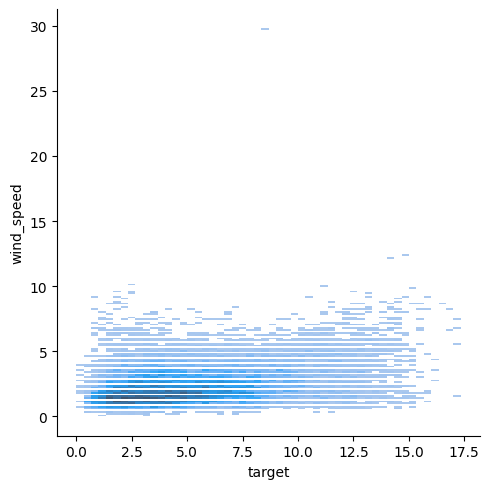

In [17]:
sns.displot(train, x = "target", y= "wind_speed")

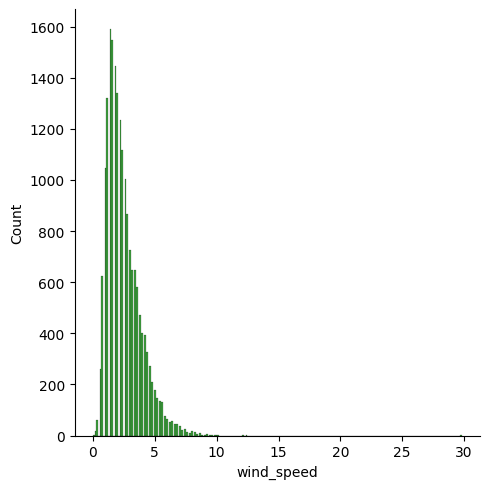

In [18]:
sns.displot(train["wind_speed"], color="g")

In [19]:
train['snowing'].unique()

array([False,  True])

In [21]:
train['precipitation'].unique()

array([0.  , 0.06, 0.12, 0.18, 0.6 , 0.24, 0.36, 0.3 , 0.42, 1.98, 0.48,
       0.66, 0.78, 0.84, 3.18, 1.74, 2.46, 0.54, 1.44, 0.54, 0.72, 2.04,
       2.52, 2.4 , 1.08, 2.16, 0.9 , 1.2 , 0.96, 2.58, 1.02, 1.26, 3.  ,
       1.32, 0.42, 1.38, 2.82, 1.5 , 0.84, 0.78, 1.32, 0.11])

In [22]:
train_object = train.select_dtypes(include='object')
train_object.columns

Index(['id'], dtype='object')

In [93]:
train['snowing'].replace(['False','True'],[0,1], inplace=True)

In [94]:
train.head()

,id,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,snowing,cloudiness,target
0,TRAIN_00000,27.8816,1013.6,46.8,2.4,232.4,0.00,NaN,0.0,1.180
1,TRAIN_00001,5.7540,1026.6,76.6,3.6,172.0,0.00,NaN,8.8,8.581
2,TRAIN_00002,20.8220,1016.2,64.8,2.2,206.0,0.06,NaN,23.0,3.978
3,TRAIN_00003,20.0758,1017.4,72.6,0.8,215.4,0.00,NaN,0.0,8.301
4,TRAIN_00004,7.5260,1023.2,82.8,1.2,158.0,0.00,NaN,15.0,1.692


In [123]:
test.head()

,id,temperature,pressure,wind_speed,wind_direction,precipitation,cloudiness
0,TEST_00000,20.702000,1021.0,2.0,104.8,0.00,23.0
1,TEST_00001,18.673669,1014.4,2.4,179.2,0.12,32.4
2,TEST_00002,29.908000,1020.6,2.6,78.0,0.60,23.0
3,TEST_00003,24.504000,1014.6,1.8,118.0,0.00,15.0
4,TEST_00004,12.590000,1011.4,1.8,110.0,0.12,34.0


In [7]:
test = test.drop(['humidity', 'snowing'], axis=1)

In [10]:
x = train.drop(['humidity', 'snowing', 'id', 'target'], axis=1)
y = train['target']

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [15]:
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(x_train, y_train)

model.score(x_train, y_train), model.score(x_test, y_test)

(0.18196614979701942, 0.04023043726038844)

In [143]:
model2 = RandomForestRegressor(max_depth=50, random_state=42)
model2.fit(x_train, y_train)

model2.score(x_train, y_train), model2.score(x_test, y_test)

(0.9028044176787234, 0.062345495611331514)

In [20]:
model3 = LogisticRegression()
model3.fit(x_train, y_train)

model3.score(x_train, y_train), model3.score(x_test, y_test)

ValueError: Unknown label type: 'continuous'

In [16]:
ids = test["id"]
predictions = model.predict(test.drop('id', axis = 1))

output = pd.DataFrame({'id' : ids, 'target' : predictions})
output.to_csv('./wind/sample_submission.csv', index=False)

C:\Users\Playdata\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
